In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import keras
modelI=keras.models.load_model('modelnew.keras')

In [15]:
import cv2

def get_parts_from_image(path, display_img = False ):
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    print(path)
    if display_img:
        plt.axis('off')
        plt.imshow(img)
        plt.show()

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    train_data=[]
    if img is not None:
        img=~img
        ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt=sorted(ctrs,key=lambda ctr:cv2.boundingRect(ctr)[0])
        w=int(28)
        h=int(28)
        rects=[]
        for c in cnt:
            x,y,w,h=cv2.boundingRect(c)
            rect=[x,y,w,h]
            rects.append(rect)
    #     print("rects", rects)
        bool_rect=[]
        for r in rects:
            l=[]
            for rec in rects:
                flag=0
                if rec!=r:
                    if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                        flag=1
                    l.append(flag)
                if rec==r:
                    l.append(0)
            bool_rect.append(l)
    #     print("bools",bool_rect)
        dump_rect=[]
        for i in range(0,len(cnt)):
            for j in range(0,len(cnt)):
                if bool_rect[i][j]==1:
                    area1=rects[i][2]*rects[i][3]
                    area2=rects[j][2]*rects[j][3]
                    if(area1==min(area1,area2)):
                        dump_rect.append(rects[i])
    #     print("dump_rects",dump_rect)
        final_rect=[i for i in rects if i not in dump_rect]
    #     print("Final_rects",final_rect)
        for r in final_rect:
            x=r[0]
            y=r[1]
            w=r[2]
            h=r[3]
            im_crop=thresh[y:y+h+10,x:x+w+10]
            im_resize=cv2.resize(im_crop,(28,28))
    #         cv2.imshow("work",im_resize)
            train_data.append(im_resize)
        
        return train_data
    

In [16]:
import numpy as np
labels_symbols = {
    10:'-', 11:'+', 12:'*', 13:'=', 14:'a', 15:'b', 16:'<', 17:'>', 18:'/',19:'√', 20:'(',21:')'
}
for i in range(0,10):
    labels_symbols[i] = chr(48+i)
    
def recognise_parts(train_data):
    s=""
    for i in range(len(train_data)):
        train_data[i]=np.array(train_data[i])
        train_data[i]=train_data[i].reshape(1,28,28,1)
    #     result=modelI.predictclasses(train_data[i])
        result=np.argmax(modelI.predict(train_data[i]), axis=1)
        s+= labels_symbols[result[0]]
    return s

In [17]:

a="test_images/untitled.jpg"
b="test_images/untitled1.jpg"
c="test_images/untitled2.jpg"
d="test_images/untitled3.jpg"
e="test_images/untitled4.jpg"
f="test_images/untitled5.jpg"

i="test_images/expression_new.jpg"

test_images/untitled.jpg


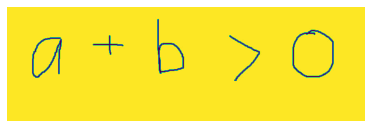

number of parts = 5


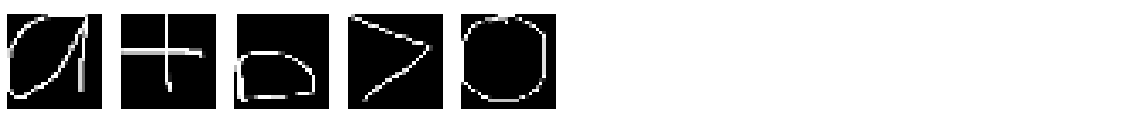

Detected Expression : a+b20


In [19]:
train_data = get_parts_from_image(a, display_img = True)
print(f"number of parts = {len(train_data)}")
plt.rcParams["figure.figsize"] = (20,2)
n_per_line = 10
for i,part in enumerate(train_data):
    if i%n_per_line == 0 :
        fig, ax = plt.subplots(ncols = n_per_line)
        for x in ax: x.axis('off')
    ax[i%n_per_line].imshow(part, cmap='gray')
    #ax.plot()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 
plt.show()

detected_exp = recognise_parts(train_data)

print(f"Detected Expression : {detected_exp}")
